In [ ]:
#Wang Zihao
# Install the compatible version of six\beautifulsoup4 mentioned in the error message
!pip install six==1.12.0
!pip install beautifulsoup4>=4.11.1
# Install OpenCV、textract、Pillow、NumPy、pytesseract
!pip install opencv-python
!pip install textract==1.6.3
!pip install Pillow
!pip install numpy
!pip install pytesseract
#Colab comes pre-installed with Tesseract, but needs to be installed manually
!apt-get update
!apt-get install tesseract-ocr

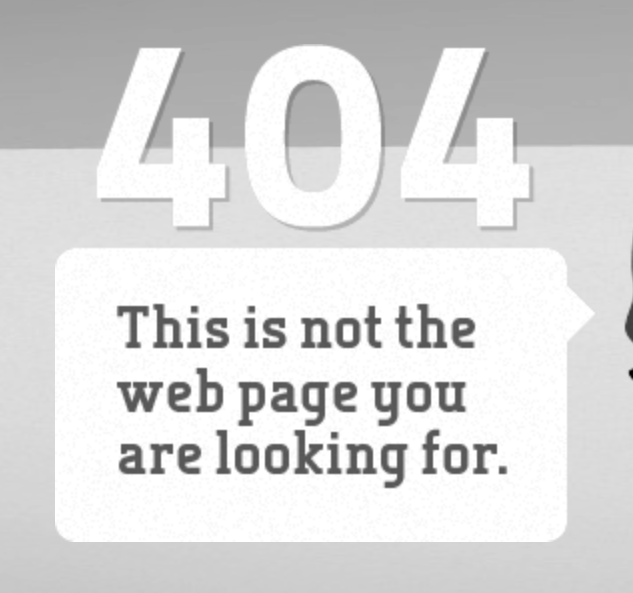

In [ ]:
#In Colab, the cv2.imshow() function is disabled because it causes the session to crash.
from google.colab.patches import cv2_imshow
#cv2_imshow(pic)#As a patch function, you can display the image directly in the cell, cv2.imshow displays it in a separate window, which is not supported by colab
import cv2
#Read the image with cv2 and convert it to grayscale using cv2.IMREAD_GRAYSCALE
pic = cv2.imread('F2.jpg', cv2.IMREAD_GRAYSCALE)#Read the image with cv2 and convert it to grayscale using cv2.IMREAD_GRAYSCALE
cv2_imshow(pic)

Preprocessing

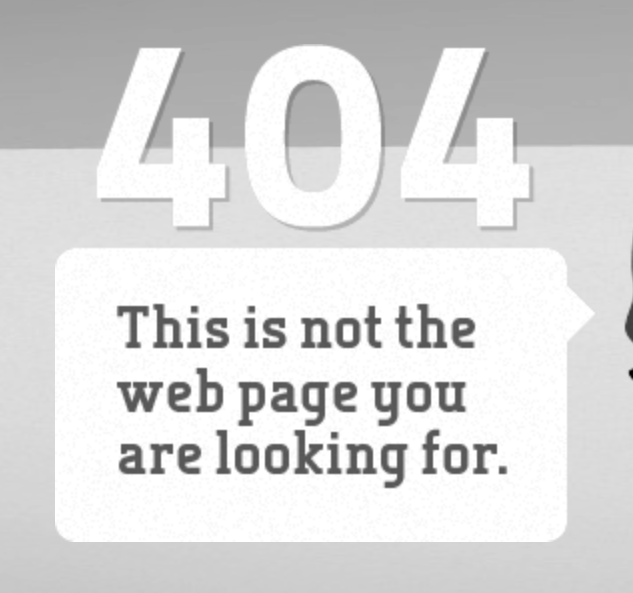

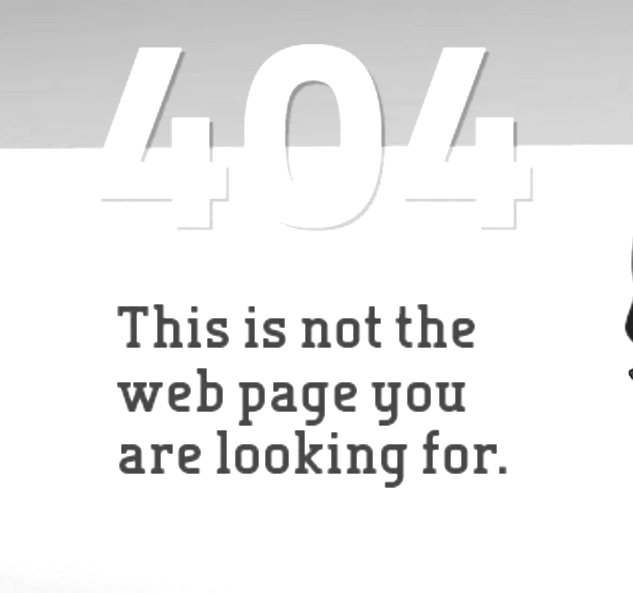

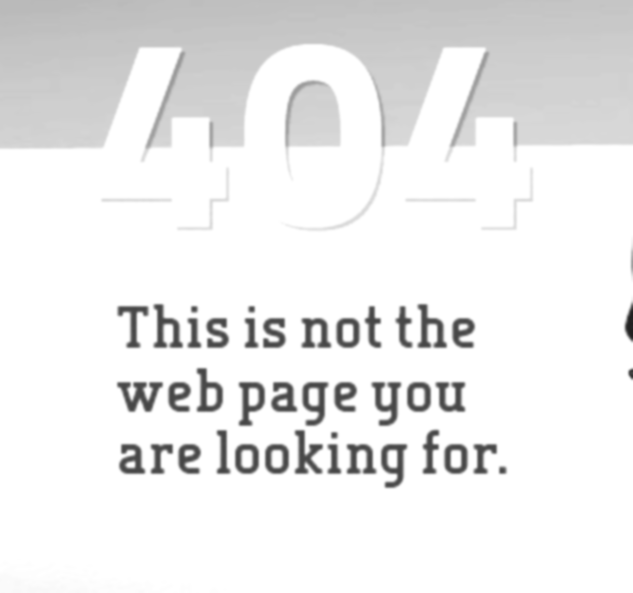

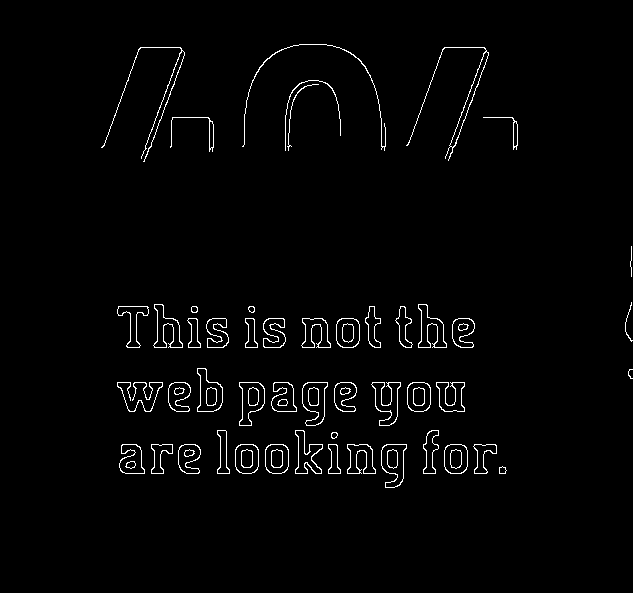

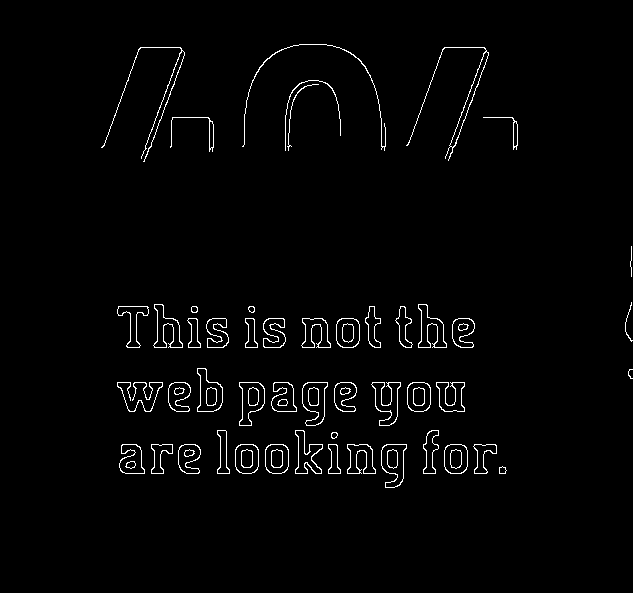

In [ ]:
#1 Contrast enhancement processing
alpha = 1.6  # Contrast
beta = -70     # Brightness Control
pic_1 =  cv2.convertScaleAbs(pic, alpha=alpha, beta=beta)
cv2_imshow(pic)
cv2_imshow(pic_1)
#2 Obfuscation
# Apply Gaussian blur. Since there is less noise in the original image, a smaller kernel and smaller standard deviation are used.
pic_2 = cv2.GaussianBlur(pic_1, (5, 5),sigmaX=0, sigmaY=0)
cv2_imshow(pic_2)
#3 Edge Detection
pic_3 = cv2.Canny(pic_2, 100, 200)
cv2_imshow(pic_3)
#4 Threshold processing. After edge detection, the text is clearer.
_, pic_4 = cv2.threshold(pic_3, 240, 255, cv2.THRESH_BINARY)
cv2_imshow(pic_4)

Draw the bounding box

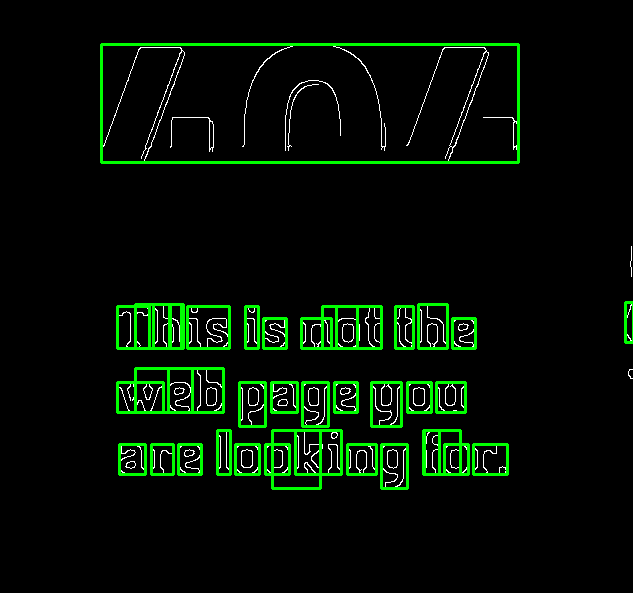

In [ ]:
import pytesseract
import cv2
# Get the height and width of the image
h, w = pic_4.shape
# Convert the grayscale image to a color (BGR) image to clearly draw colored bounding boxes
pic_4_color = cv2.cvtColor(pic_4, cv2.COLOR_GRAY2BGR)
# Use pytesseract to get the text areas and return the bounding box for each character
boxes = pytesseract.image_to_boxes(pic_4)
# Create a copy pic_5 to draw bounding boxes on it, ensuring the original image is not affected
pic_5 = pic_4_color.copy()
# 5. Iterate through each bounding box and draw it
for b in boxes.splitlines():
    b = b.split(' ')  # Split each bounding box information into characters and their coordinates
    x1, y1, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    # Pytesseract's y-coordinate starts from the bottom of the image, while OpenCV starts from the top, so adjust the y-coordinate
    y1, y2 = h - y1, h - y2
    # Draw a green border on the image (where (0, 255, 0) represents green and the line thickness is 2)
    cv2.rectangle(pic_5, (x1, y1), (x2, y2), (0, 255, 0), 2)
# 6. Display the final processed image with green borders
cv2_imshow(pic_5)

Extracting and displaying text

In [ ]:
import cv2
import pytesseract
# Directly extract text from the entire image
text = pytesseract.image_to_string(pic_4, lang='eng')
# Print the extracted text
print(text)

a

Thais is not tae |
web page you
are looking tor.

